In [9]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd


In [28]:
input_files = ["data\sequence.fasta"]

In [14]:
def calculate_gc_content(sequence):
    """
    Calculate GC content percentage for a given DNA sequence.
    :param sequence: DNA sequence (string)
    :return: GC content as a float
    """
    g_count = sequence.upper().count("G")
    c_count = sequence.upper().count("C")
    total_count = len(sequence)

    if total_count == 0:
        return 0.0

    gc_content = ((g_count + c_count) / total_count) * 100
    return gc_content

In [3]:
def process_fasta(input_files, output_file):
    """
    Process multiple FASTA files and calculate GC content for each sequence.
    Save the results to a specified output file.
    :param input_files: List of FASTA file paths
    :param output_file: Path to the output file
    """
    with open(output_file, "w") as out:
        for input_file in input_files:
            out.write(f"\nProcessing file: {input_file}\n")
            print(f"\nProcessing file: {input_file}")
            try:
                sequences = SeqIO.parse(input_file, "fasta")
                total_gc = 0
                total_sequences = 0

                for record in sequences:
                    total_sequences += 1
                    gc_content = calculate_gc_content(str(record.seq))
                    total_gc += gc_content
                    result = f"Sequence: {record.id}, GC Content: {gc_content:.2f}%"
                    out.write(result + "\n")
                    print(result)

                if total_sequences > 0:
                    average_gc = total_gc / total_sequences
                    result = f"Average GC Content for {input_file}: {average_gc:.2f}%"
                    out.write(result + "\n")
                    print(result)
                else:
                    result = f"No sequences found in {input_file}."
                    out.write(result + "\n")
                    print(result)

            except Exception as e:
                error_message = f"Error processing file {input_file}: {e}"
                out.write(error_message + "\n")
                print(error_message)


In [29]:
# Predefined variables for input and output files
  # List of input FASTA files
output_file = "output.txt"        # Path to the output file
process_fasta(input_files, output_file)


Processing file: data\sequence.fasta
Sequence: MZ265787.1, GC Content: 28.50%
Sequence: MZ265786.1, GC Content: 32.06%
Sequence: MZ265784.1, GC Content: 41.61%
Sequence: MZ265782.1, GC Content: 27.93%
Sequence: MZ265783.1, GC Content: 29.70%
Sequence: MZ265781.1, GC Content: 27.08%
Sequence: MZ265779.1, GC Content: 34.34%
Sequence: MZ265778.1, GC Content: 33.33%
Sequence: MZ265776.1, GC Content: 27.87%
Sequence: MZ265774.1, GC Content: 29.79%
Average GC Content for data\sequence.fasta: 31.22%


In [6]:
def read_gc_content_from_file(output_file):
    """
    Reads sequence IDs and GC content from the output file.
    :param output_file: Path to the output file containing processed GC content data.
    :return: A tuple (sequence_ids, gc_content, average_gc).
    """
    sequence_ids = []
    gc_content = []
    average_gc = None

    with open(output_file, "r") as file:
        for line in file:
            if line.startswith("Sequence:"):
                parts = line.split(",")
                seq_id = parts[0].split(":")[1].strip()
                gc = float(parts[1].split(":")[1].strip().replace("%", ""))
                sequence_ids.append(seq_id)
                gc_content.append(gc)
            elif line.startswith("Average GC Content"):
                average_gc = float(line.split(":")[1].strip().replace("%", ""))
    
    return sequence_ids, gc_content, average_gc


In [7]:
def read_gc_content_from_file(output_file):
    """
    Reads sequence IDs and GC content from the output file.
    :param output_file: Path to the output file containing processed GC content data.
    :return: A tuple (sequence_ids, gc_content, average_gc).
    """
    sequence_ids = []
    gc_content = []
    average_gc = None

    with open(output_file, "r") as file:
        for line in file:
            if line.startswith("Sequence:"):
                parts = line.split(",")
                seq_id = parts[0].split(":")[1].strip()
                gc = float(parts[1].split(":")[1].strip().replace("%", ""))
                sequence_ids.append(seq_id)
                gc_content.append(gc)
            elif line.startswith("Average GC Content"):
                average_gc = float(line.split(":")[1].strip().replace("%", ""))
    
    return sequence_ids, gc_content, average_gc


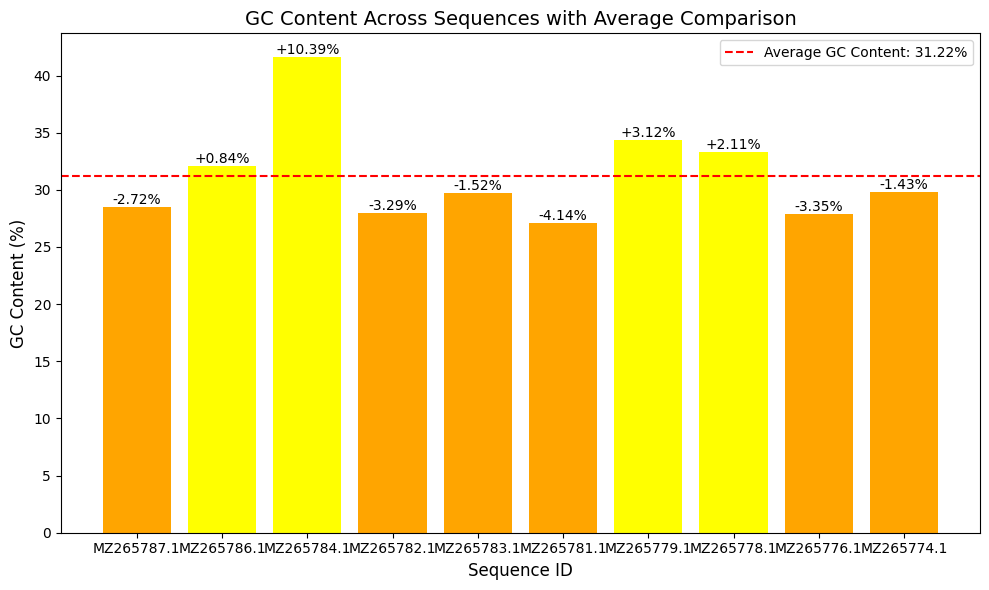

In [8]:
# Path to the output file
output_file = "result.txt"  # Replace with the actual path to your output file

# Read data
sequence_ids, gc_content, average_gc = read_gc_content_from_file(output_file)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sequence_ids, gc_content, color=["orange" if gc < average_gc else "yellow" for gc in gc_content])

# Highlight the average GC content as a horizontal line
plt.axhline(y=average_gc, color="red", linestyle="--", label=f"Average GC Content: {average_gc:.2f}%")

# Add labels above the bars to show the difference from the average
for bar, gc in zip(bars, gc_content):
    diff = gc - average_gc
    label = f"{diff:+.2f}%"  # Show positive or negative difference
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.xlabel("Sequence ID", fontsize=12)
plt.ylabel("GC Content (%)", fontsize=12)
plt.title("GC Content Across Sequences with Average Comparison", fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()

In [10]:
data = {
    "Sequence ID": sequence_ids,
    "GC Content (%)": gc_content
}
df = pd.DataFrame(data)

In [11]:
def classify_region(gc_content, avg_gc):
    if gc_content >= avg_gc + 1:  # GC-rich
        return "Coding (GC-rich)"
    elif gc_content <= avg_gc - 1:  # GC-poor
        return "Noncoding (GC-poor)"
    else:  # Near average
        return "Neutral (Mixed)"

In [12]:
df["Region Type"] = df["GC Content (%)"].apply(lambda x: classify_region(x, average_gc))

# Display results
print(df)

# Optionally save results to a new file
df.to_csv("classified_gc_content.csv", index=False)
print("Results saved to 'classified_gc_content.csv'.")


  Sequence ID  GC Content (%)          Region Type
0  MZ265787.1           28.50  Noncoding (GC-poor)
1  MZ265786.1           32.06      Neutral (Mixed)
2  MZ265784.1           41.61     Coding (GC-rich)
3  MZ265782.1           27.93  Noncoding (GC-poor)
4  MZ265783.1           29.70  Noncoding (GC-poor)
5  MZ265781.1           27.08  Noncoding (GC-poor)
6  MZ265779.1           34.34     Coding (GC-rich)
7  MZ265778.1           33.33     Coding (GC-rich)
8  MZ265776.1           27.87  Noncoding (GC-poor)
9  MZ265774.1           29.79  Noncoding (GC-poor)
Results saved to 'classified_gc_content.csv'.
